In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from utils.utils import normalizeRows, softmax
from pprint import pprint

random.seed(31415)
np.random.seed(9265)

In [10]:
dummy_vectors = normalizeRows(np.random.randn(10, 3))
dummy_tokens = dict([("a", 0), ("b", 1), ("c", 2), ("d", 3), ("e", 4)])
# dummy_vectors
dummy_tokens

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [2]:
dataset = type('dummy', (), {})()

def dummySampleTokenIdx():
    return random.randint(0, 4)

def getRandomContext(C):
    tokens = ["a", "b", "c", "d", "e"]
    return tokens[random.randint(0,4)], \
        [tokens[random.randint(0,4)] for i in range(2*C)]

dataset.sampleTokenIdx = dummySampleTokenIdx
dataset.getRandomContext = getRandomContext

random.seed(31415)
np.random.seed(9265)
dummy_vectors = normalizeRows(np.random.randn(10, 3))
dummy_tokens = dict([("a", 0), ("b", 1), ("c", 2), ("d", 3), ("e", 4)])

pprint( "dataset.getRandomContext(2)" )
pprint( dataset.getRandomContext(2) )
pprint( "dataset.sampleTokenIdx()" )
pprint( dataset.sampleTokenIdx() )
pprint( "dummy_vectors" )
pprint( dummy_vectors )
pprint( "dummy_tokens" )
pprint( dummy_tokens )

'dataset.getRandomContext(2)'
('e', ['c', 'd', 'a', 'e'])
'dataset.sampleTokenIdx()'
4
'dummy_vectors'
array([[-0.96735714, -0.02182641,  0.25247529],
       [ 0.73663029, -0.48088687, -0.47552459],
       [-0.27323645,  0.12538062,  0.95374082],
       [-0.56713774, -0.27178229, -0.77748902],
       [-0.59609459,  0.7795666 ,  0.19221644],
       [-0.6831809 , -0.04200519,  0.72904007],
       [ 0.18289107,  0.76098587, -0.62245591],
       [-0.61517874,  0.5147624 , -0.59713884],
       [-0.33867074, -0.80966534, -0.47931635],
       [-0.52629529, -0.78190408,  0.33412466]])
'dummy_tokens'
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}


# Implementando a sigmoid

In [16]:
def sigmoid(x):
    """
    Computa a função sigmóide para a entrada.
     Argumentos:
     x - um escalar ou um numpy array
     Retorna:
     s - sigmóide (x)
    """

    ### Seu código aqui (~1 Linha)
    s = 1 / ( 1 + np.exp(-x) )

    ### Fim do seu código

    return s

a = np.array([1])

sigmoid(a)

array([0.73105858])

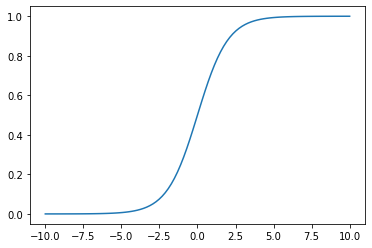

In [59]:
step = 100
x1 = np.linspace(-10, 10, step, endpoint=True)
x2 = sigmoid(x1)
plt.plot(x1, x2)
plt.show()

In [6]:
# Argumentos:
# centerWordVec - numpy ndarray, vetor da palavra central
#                 com shape (comprimento do vetor da palavra,)
#                 (v_c no enunciado pdf)
# outsideWordIdx - inteiro, o índice da palavra externa
#                 (o de u_o no enunciado pdf)
# outsideVectors - matriz de vetores externos com shape (número de palavras no vocabulário, dimensão do embedding)
#                 para todas as palavras do vocabulário, cada linha um vetor (U (|V| x n) no folheto em pdf)
# dataset - necessário para amostragem negativa, não utilizado aqui.


# v_c
centerWordVec = np.array([1,2,3])
# o de u_o
outsideWordIdx = 1
# U de shape |V| x n, onde n o tamanho arbitrario.
outsideVectors = np.array([(1,2,3), (4,5,6), (7,8,9), (10,11,12)], dtype = float)

windowSize1 = random.randint(1, 5)
centerWord, context = dataset.getRandomContext(windowSize1)


In [8]:
outsideVectors = np.array([(1,2,3), (4,5,6), (7,8,9), (10,11,12)], dtype = float)
v_c = centerWordVec
V_size = outsideVectors.shape[0]
o = outsideWordIdx
U = outsideVectors

vc_UT = v_c.dot(U.T)
y_hat = softmax( vc_UT )

loss = -np.log( y_hat[outsideWordIdx] ) 

y = np.zeros(V_size)
y[outsideWordIdx] = 1

pprint(f"y    :{y}" )
pprint(f"y_hat:{y_hat}" )

y_diff = y_hat - y
dJ_dv = U.T.dot( y_diff ) # dJ_dv = gradCenterVec
# --- ok ate aqui


y_hat[ outsideWordIdx ] = y_hat[ outsideWordIdx ] - 1
pprint(f"y_hat_w=o - 1:{y_hat}" )

dJ_du = np.zeros(outsideVectors.shape)
for o in range(V_size):
#     v_o = outsideVectors[o]
    dJ_du[o] = v_c.dot(  y_diff[o] )


pprint(f"v_c :{v_c}" )
pprint(f"UT :{U}" )

pprint(f"vc_UT :{vc_UT}" )
pprint(f"y_hat :{y_hat}" )

pprint("-" * 50)

pprint(f"loss: {loss}")
pprint(f"dJ_dv: {dJ_dv}")
pprint("dJ_du:")
dJ_du
# U.shape
# np.arange(V_size)

'y    :[0. 1. 0. 0.]'
'y_hat:[3.53262852e-24 2.31952279e-16 1.52299795e-08 9.99999985e-01]'
('y_hat_w=o - 1:[ 3.53262852e-24 -1.00000000e+00  1.52299795e-08  '
 '9.99999985e-01]')
'v_c :[1 2 3]'
'UT :[[ 1.  2.  3.]\n [ 4.  5.  6.]\n [ 7.  8.  9.]\n [10. 11. 12.]]'
'vc_UT :[-54. -36. -18.   0.]'
'y_hat :[ 3.53262852e-24 -1.00000000e+00  1.52299795e-08  9.99999985e-01]'
'--------------------------------------------------'
'loss: 36.00000001522998'
'dJ_dv: [5.99999995 5.99999995 5.99999995]'
'dJ_du:'


array([[ 3.53262852e-24,  7.06525704e-24,  1.05978856e-23],
       [-1.00000000e+00, -2.00000000e+00, -3.00000000e+00],
       [ 1.52299795e-08,  3.04599590e-08,  4.56899385e-08],
       [ 9.99999985e-01,  1.99999997e+00,  2.99999995e+00]])

In [401]:
y_hat = softmax(np.dot(centerWordVec, outsideVectors.T))

# loss = -np.log(softmax(np.dot(outsideVectors[outsideWordIdx], centerWordVec))) # wrong answer
loss = -np.log(y_hat)[outsideWordIdx] # not sure why...???

delta = y_hat.copy() # y_hat - y
delta[outsideWordIdx] -= 1
# part (b) of written part
gradCenterVec = np.dot(outsideVectors.T, delta)
# part (c) of written part
gradOutsideVecs = np.dot(delta[:, np.newaxis], centerWordVec[np.newaxis, :]) # not sure why...???


print( loss )
print( gradCenterVec)
print(gradOutsideVecs )

36.00000001522998
[5.99999995 5.99999995 5.99999995]
[[ 3.53262852e-24  7.06525704e-24  1.05978856e-23]
 [-1.00000000e+00 -2.00000000e+00 -3.00000000e+00]
 [ 1.52299795e-08  3.04599590e-08  4.56899385e-08]
 [ 9.99999985e-01  1.99999997e+00  2.99999995e+00]]


In [403]:
scores = outsideVectors @ centerWordVec
prob = softmax(scores)[:, np.newaxis]

loss = float(-np.log(prob[outsideWordIdx]))

trueOutsideVec = outsideVectors[outsideWordIdx]
gradCenterVec = -trueOutsideVec + np.sum(outsideVectors * prob, axis=0)

gradOutsideVecs = np.dot(prob, centerWordVec[:, np.newaxis].T)
gradOutsideVecs[outsideWordIdx] -= centerWordVec

print( loss )
print( gradCenterVec)
print(gradOutsideVecs )

36.00000001522998
[5.99999995 5.99999995 5.99999995]
[[ 3.53262852e-24  7.06525704e-24  1.05978856e-23]
 [-1.00000000e+00 -2.00000000e+00 -3.00000000e+00]
 [ 1.52299795e-08  3.04599590e-08  4.56899385e-08]
 [ 9.99999985e-01  1.99999997e+00  2.99999995e+00]]


# negSamplingLossAndGradient

In [9]:
# Argumentos:
# centerWordVec - numpy ndarray, vetor da palavra central
#                 com shape (comprimento do vetor da palavra,)
#                 (v_c no enunciado pdf)
# outsideWordIdx - inteiro, o índice da palavra externa
#                 (o de u_o no enunciado pdf)
# outsideVectors - matriz de vetores externos com shape (número de palavras no vocabulário, dimensão do embedding)
#                 para todas as palavras do vocabulário, cada linha um vetor (U (|V| x n) no folheto em pdf)
# dataset - necessário para amostragem negativa, não utilizado aqui.

#     Retorna:
#     loss  -  naive softmax loss
#     gradCenterVec - o gradiente em relação ao vetor da palavra central
#                      com shape (dimensão do embedding,)
#                      (dJ / dv_c no enunciado pdf)
#     gradOutsideVecs - o gradiente em relação a todos os vetores de palavras externos
#                     com shape (num palavras no vocabulário, dimensão do embedding)
#                     (dJ / dU)
#     """

# v_c
centerWordVec = np.array([1,2,3])
# o de u_o
outsideWordIdx = 1
# U de shape |V| x n, onde n o tamanho arbitrario.
outsideVectors = np.array([(1,2,3), (4,5,6), (7,8,9), (10,11,12)], dtype = float)

windowSize1 = random.randint(1, 5)
centerWord, context = dataset.getRandomContext(windowSize1)

In [27]:
outsideVectors = np.array([(1,2,3), (4,5,6), (7,8,9), (10,11,12)], dtype = float)
v_c = centerWordVec
V_size = outsideVectors.shape[0]
o = outsideWordIdx
U = outsideVectors

u_o = outsideVectors[outsideWordIdx]

vc_UT = v_c.dot(U.T)
y_hat = softmax( vc_UT )

loss = -np.log( y_hat[outsideWordIdx] )


pprint(f"v_c :{v_c}" )
pprint(f"u_o :{u_o}" )

pprint(f"UT :{U}" )

pprint(f"vc_UT :{vc_UT}" )
pprint(f"y_hat :{y_hat}" )

pprint("-" * 50)

pprint(f"loss: {loss}")
# pprint(f"dJ_dv: {dJ_dv}")
# pprint("dJ_du:")
# dJ_du
# U.shape
# np.arange(V_size)

- np.log( sigmoid( v_c.dot(u_o) ) )
[1,2,3,4,5]
np.sum([1,2,3,4,5])

'v_c :[1 2 3]'
'u_o :[4. 5. 6.]'
'UT :[[ 1.  2.  3.]\n [ 4.  5.  6.]\n [ 7.  8.  9.]\n [10. 11. 12.]]'
'vc_UT :[-54. -36. -18.   0.]'
'y_hat :[3.53262852e-24 2.31952279e-16 1.52299795e-08 9.99999985e-01]'
'--------------------------------------------------'
'loss: 36.00000001522998'


15

In [60]:
vc = np.array( [-0.27323645,  0.12538062,  0.95374082] )
uk = np.array(
[[ 0.18289107,  0.76098587, -0.62245591],
 [-0.52629529, -0.78190408,  0.33412466],
 [ 0.18289107,  0.76098587, -0.62245591],
 [-0.33857074, -0.80966534, -0.47931635],
 [-0.33857074, -0.80966534, -0.47931635],
 [-0.61517874,  0.5147624,  -0.59713884],
 [-0.52629529, -0.78190408,  0.33412466],
 [-0.33857074, -0.80966534, -0.47931635],
 [-0.61517874,  0.5147624, -0.59713884],
 [-0.52629529, -0.78190408,  0.33412466]])
uk_vc = np.array(
    [-0.54822123,  0.36443576, -0.54822123, -0.46615005, -0.46615005, -0.33688521,
      0.36443576, -0.46615005, -0.33688521,  0.36443576])

uo = vc
vc
uk
uk_vc

array([-0.54822123,  0.36443576, -0.54822123, -0.46615005, -0.46615005,
       -0.33688521,  0.36443576, -0.46615005, -0.33688521,  0.36443576])

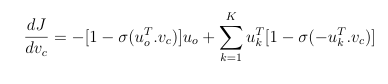

In [64]:
# -uo * (1 - sigmoid(uo_vc)) + np.sum(np.expand_dims(1 - sigmoid(-uk_vc), axis=1) * uk, axis=0)
# np.expand_dims(1 - sigmoid(-uk_vc), axis=1)
np.expand_dims(1 - sigmoid(-uk_vc), axis=1)
-uk_vc

array([ 0.54822123, -0.36443576,  0.54822123,  0.46615005,  0.46615005,
        0.33688521, -0.36443576,  0.46615005,  0.33688521, -0.36443576])

In [78]:
np.expand_dims(1 - sigmoid(-uk_vc), axis=1) 

array([[0.3662772 ],
       [0.59011378],
       [0.3662772 ],
       [0.38552788],
       [0.38552788],
       [0.41656629],
       [0.59011378],
       [0.38552788],
       [0.41656629],
       [0.59011378]])

In [72]:
uk

array([[ 0.18289107,  0.76098587, -0.62245591],
       [-0.52629529, -0.78190408,  0.33412466],
       [ 0.18289107,  0.76098587, -0.62245591],
       [-0.33857074, -0.80966534, -0.47931635],
       [-0.33857074, -0.80966534, -0.47931635],
       [-0.61517874,  0.5147624 , -0.59713884],
       [-0.52629529, -0.78190408,  0.33412466],
       [-0.33857074, -0.80966534, -0.47931635],
       [-0.61517874,  0.5147624 , -0.59713884],
       [-0.52629529, -0.78190408,  0.33412466]])

In [76]:
np.expand_dims(1 - sigmoid(-uk_vc), axis=1) * uk

array([[ 0.06698883,  0.27873177, -0.22799141],
       [-0.3105741 , -0.46141237,  0.19717157],
       [ 0.06698883,  0.27873177, -0.22799141],
       [-0.13052846, -0.31214856, -0.18478982],
       [-0.13052846, -0.31214856, -0.18478982],
       [-0.25626273,  0.21443267, -0.24874791],
       [-0.3105741 , -0.46141237,  0.19717157],
       [-0.13052846, -0.31214856, -0.18478982],
       [-0.25626273,  0.21443267, -0.24874791],
       [-0.3105741 , -0.46141237,  0.19717157]])

In [77]:
np.sum(np.expand_dims(1 - sigmoid(-uk_vc), axis=1) * uk, axis=0)

array([-1.70185549, -1.33435393, -0.91633339])

In [85]:
# -uo * (1 - sigmoid(uo_vc)) 
uk

array([[ 0.18289107,  0.76098587, -0.62245591],
       [-0.52629529, -0.78190408,  0.33412466],
       [ 0.18289107,  0.76098587, -0.62245591],
       [-0.33857074, -0.80966534, -0.47931635],
       [-0.33857074, -0.80966534, -0.47931635],
       [-0.61517874,  0.5147624 , -0.59713884],
       [-0.52629529, -0.78190408,  0.33412466],
       [-0.33857074, -0.80966534, -0.47931635],
       [-0.61517874,  0.5147624 , -0.59713884],
       [-0.52629529, -0.78190408,  0.33412466]])

In [92]:
for i in uk:
    print(i)
    uk[i] = 0

[ 0.18289107  0.76098587 -0.62245591]


IndexError: arrays used as indices must be of integer (or boolean) type